In [24]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [25]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [26]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("data/PlantVillage/",
                                                              shuffle=True,
                                                              image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                              batch_size = BATCH_SIZE
                                                             )

Found 2152 files belonging to 3 classes.


In [27]:
class_names = dataset.class_names

In [28]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

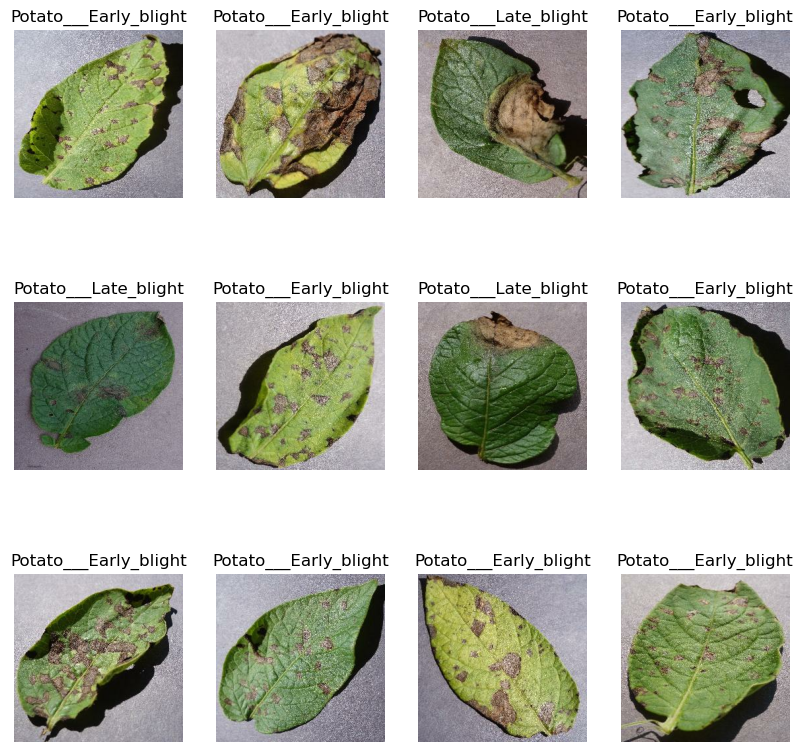

In [29]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [30]:
# 80% training, 10% validation, 10% test

In [31]:
def get_dataset_parts(ds,train_split=0.8,val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split* ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [32]:
train_ds, val_ds, test_ds = get_dataset_parts(dataset)

In [33]:
len(train_ds)

54